### Pandas Project: Immobilien Scout 24
#### Dataset: Immobilienscout 24
> Description: Immobilienscout 24 is the biggest platform for renting apartments in Germany. The company is interested in the Berlin housing market and wants to understand where to publish advertisements.
> Dataset:
> - `Region`: where the flat is located in the Berlin district
> - `Condition`: condition of the flat
> - `Rooms`: number of rooms in the flat
> - `Rent`: monthly rent for the flat
> - `Year_Construction`: year in which the flat was constructed
> - `Space`: Flat size, measured in square meters

#### Tasks:
PART A:
> 1. How many apartments are there in Mitte in a "well-kept" condition?
> 2. How many apartments in Kreuzberg were built before 1900?
> 3. What are the average sizes of the apartments having 4 rooms?
> 4. Which is the most expensive region on average, and what is the maximum rent for this region?
> 5. What are the min, max, and average number of rooms of the apartments in Köpenick?
> 6. What is the average price per square meter for different Regions?
> 7. Is there a difference in average room space (Space divided by Rooms) for apartments built after 2000 versus apartments built before 2000?
> 8. What's the percentage of the apartments in high-quality condition? High-quality conditions are: `first_time_use`, `mint_condition`, `refurbished`, `first_time_use_after_refurbishment`, and `fully_renovated`. The rest will be categorized as low-quality conditions.

PART B:
> 10. Two new columns are added to the dataset: `Posted_date` and `Rented_date.`
>   <br> a) How many apartments were posted each month?
    <br> b) How many days does it take from posting about the apartment and renting it? We are interested in how this number changes depending on the month of the posting.

#### Import Dataset:

In [4]:
import pandas as pd

immo = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")

In [5]:
immo.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [6]:
immo.sample(5)

#picks 5 random rows

,Region,Condition,Rooms,Rent,Year_Construction,Space
263,Tiergarten,well_kept,2.0,1500.00,1999,61.00
158,Mitte,no_information,4.0,2250.00,2013,127.00
324,Wedding,well_kept,3.5,960.38,1918,102.00
331,Tiergarten,first_time_use,3.0,1570.00,1919,95.50
582,Tiergarten,fully_renovated,1.0,1163.00,1990,52.85


In [7]:
immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             764 non-null    object 
 1   Condition          764 non-null    object 
 2   Rooms              764 non-null    float64
 3   Rent               764 non-null    float64
 4   Year_Construction  764 non-null    int64  
 5   Space              764 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 35.9+ KB


In [8]:
len(immo)

764

### <center>Pandas Project: Immobilien Scout 24 (Part One)</center>
***

#### Task 1: 
*How many apartments are there in Mitte in a 'well-kept' condition?*<br>
> There are 96 'well-kept' apartments in Berlin, and 6 of them are in Mitte.
***

In [11]:
type(immo['Condition'])

pandas.core.series.Series

In [12]:
immo.Condition.value_counts()

Condition
first_time_use                        270
mint_condition                        143
no_information                        111
well_kept                              96
refurbished                            40
first_time_use_after_refurbishment     36
fully_renovated                        35
modernized                             29
need_of_renovation                      4
Name: count, dtype: int64

In [152]:
# well-kept apartments in Berlin 
immo[(immo['Condition'] == 'well_kept')]

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2,Room_Space,Quality,Posted_date,Rented_date,rent_delta,Duration_To_Rent
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.71,41.805,low_quality,2020-01-28,2020-02-10,13 days,13 days
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.69,42.795,low_quality,2020-02-05,2020-03-11,35 days,35 days
5,Köpenick,well_kept,2.0,840.00,1997,73.51,11.43,36.755,low_quality,2020-09-22,2020-11-06,45 days,45 days
7,Charlottenburg,well_kept,2.0,730.73,1900,72.61,10.06,36.305,low_quality,2020-10-19,2020-10-30,11 days,11 days
8,Friedrichsfelde,well_kept,2.0,561.93,1971,62.40,9.01,31.200,low_quality,2020-06-03,2020-06-16,13 days,13 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,Prenzlauer,well_kept,2.0,1489.00,1901,73.41,20.28,36.705,low_quality,2020-06-26,2020-08-07,42 days,42 days
735,Mitte,well_kept,2.0,1350.00,2014,68.00,19.85,34.000,low_quality,2020-09-24,2020-09-25,1 days,1 days
736,Mitte,well_kept,3.0,3500.00,2009,165.00,21.21,55.000,low_quality,2020-10-15,2020-10-16,1 days,1 days
757,Tiergarten,well_kept,4.0,1970.00,1900,127.00,15.51,31.750,low_quality,2020-02-11,2020-04-03,52 days,52 days


In [13]:
len(immo[(immo['Condition'] == 'well_kept') & (immo['Region'] == 'Mitte')])

6

***
#### Task 2. 
- *How many apartments in Kreuzberg were built before 1900?*
> Answer: There are 3 apartments in Kreuzberg built before 1900.

***

In [16]:
immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             764 non-null    object 
 1   Condition          764 non-null    object 
 2   Rooms              764 non-null    float64
 3   Rent               764 non-null    float64
 4   Year_Construction  764 non-null    int64  
 5   Space              764 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 35.9+ KB


In [17]:
#2. How many apartments are there in Kreuzberg built before 1900?
immo[(immo['Region'] == 'Kreuzberg') & (immo['Year_Construction'] < 1900)].value_counts()


Region     Condition                           Rooms  Rent    Year_Construction  Space
Kreuzberg  first_time_use                      5.0    4400.0  1867               236.0    1
           first_time_use_after_refurbishment  2.0    1399.0  1874               50.0     1
           refurbished                         4.0    2850.0  1895               127.0    1
Name: count, dtype: int64

***
#### Task 3. 
- *What is the average space of the apartments having 4 rooms?*
> Answer: the average space of apartments having 4 rooms is 130.86 sq meters.
***

In [19]:
immo[immo['Rooms'] == 4.0]

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
10,Mitte,first_time_use,4.0,2499.00,2019,125.20
19,Mitte,first_time_use,4.0,2179.00,2019,95.80
31,Charlottenburg,first_time_use,4.0,2230.00,2019,112.26
...,...,...,...,...,...,...
722,Prenzlauer,no_information,4.0,2740.00,1906,99.65
741,Mitte,mint_condition,4.0,3925.00,2016,138.00
748,Mitte,mint_condition,4.0,4040.00,2015,176.50
757,Tiergarten,well_kept,4.0,1970.00,1900,127.00


In [20]:
round(immo[immo['Rooms'] == 4.0]['Space'].mean(), 2)

130.86

***
#### Task 4. 
- *What is the most expensive region on average and what is the maximum rent for this region?*
> Answer: the most expensive region on average is the Mitte region, and the most expensive rent in this region is 14207 Euros.
***

In [22]:
immo.groupby('Region')[['Rent']].mean().sort_values('Rent', ascending = True)

,Rent
Region,
Wedding,847.138571
Friedrichsfelde,1043.871731
Köpenick,1125.475818
Neukölln,1188.114915
Wilmersdorf,1748.646226
Charlottenburg,1753.452532
Tiergarten,1914.824795
Prenzlauer,1996.962264
Kreuzberg,2049.138085


In [23]:
immo[immo['Region'] == 'Mitte'].Rent.max()

14207.0

In [24]:
immo[immo['Region'] == 'Mitte'].describe()

,Rooms,Rent,Year_Construction,Space
count,153.000000,153.000000,153.000000,153.000000
mean,2.754902,2408.725033,2000.921569,96.235556
std,0.959916,1543.059190,37.467096,51.157944
min,1.000000,398.000000,1864.000000,18.000000
25%,2.000000,1533.000000,2009.000000,66.000000
50%,3.000000,1959.000000,2016.000000,85.480000
75%,3.000000,2620.000000,2018.000000,117.300000
max,5.000000,14207.000000,2020.000000,413.910000


***
#### Task 5. 
- *What are the min, max and average number of rooms of the apartments in Köpenick? (Bonus)*
> Answer: The minimum number of rooms in apartments in Köpenick is 1, and the maximum number of rooms in apartments in Köpenick is 4. On average, there are about 2 rooms in apartments in Köpenick.
***

In [26]:
immo[immo['Region'] == 'Köpenick'].Rooms.agg(['mean', 'min', 'max']).round(2)

mean    2.28
min     1.00
max     4.00
Name: Rooms, dtype: float64

In [27]:
immo.groupby('Region')[['Rooms']].agg(['mean', 'min', 'max']).round(2)

Rooms          
                 mean  min  max
Region                         
Charlottenburg   2.53  1.0  5.0
Friedrichsfelde  2.50  1.0  4.5
Kreuzberg        2.49  1.0  5.0
Köpenick         2.28  1.0  4.0
Mitte            2.75  1.0  5.0
Neukölln         2.28  1.0  5.0
Prenzlauer       2.66  1.0  6.0
Tiergarten       2.74  1.0  5.0
Wedding          1.73  1.0  4.0
Wilmersdorf      2.61  1.0  7.0

In [28]:
immo[immo['Region'] == 'Köpenick'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 2 to 762
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             55 non-null     object 
 1   Condition          55 non-null     object 
 2   Rooms              55 non-null     float64
 3   Rent               55 non-null     float64
 4   Year_Construction  55 non-null     int64  
 5   Space              55 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.0+ KB


***
#### Task 6. 
*Add the column describing the average price per square meter for different regions.*
***

In [30]:
#relevant columns: rent, space, region
#coding function for calculating price per square meter

def calc_price_per_sm(row):
    return row.Rent / row.Space

immo['Rent_per_m2'] = immo.apply(calc_price_per_sm, axis = 1).round(2)

In [31]:
immo.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.69
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.91
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.71
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.69
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.74


> to delete a column, 'inplace = True' allows modification of the original dataset rather than a copy
immo.drop('Check', axis = 1, inplace = True)

In [33]:
immo.groupby('Region')[['Rent_per_m2']].mean().round(2)

,Rent_per_m2
Region,
Charlottenburg,21.39
Friedrichsfelde,16.09
Kreuzberg,23.33
Köpenick,15.63
Mitte,25.97
Neukölln,17.35
Prenzlauer,21.96
Tiergarten,21.46
Wedding,22.81


***
#### Task 7. 
*Is there a difference of average room space (`Space` divided by `Rooms`) for apartments built before versus after 2000?*
>
***

In [35]:
#Space/Rooms

def calc_room_space(row):
    return row.Space / row.Rooms

immo['Room_Space'] = immo.apply(calc_room_space, axis = 1)

In [36]:
immo.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2,Room_Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.69,29.300
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.91,29.330
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.71,41.805
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.69,42.795
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.74,44.135


In [37]:
#for queries, don't add any spaces 
apartments_before_2000 = immo.query('Year_Construction<2000').Room_Space.mean()
print(f'Average room space for apartment before 2000: {apartments_before_2000}')

apartments_after_2000 = immo.query('Year_Construction>2000').Room_Space.mean()
print(f'Average room space for apartment before 2000: {apartments_after_2000}')

Average room space for apartment before 2000: 33.80296370469267
Average room space for apartment before 2000: 32.56172319403952


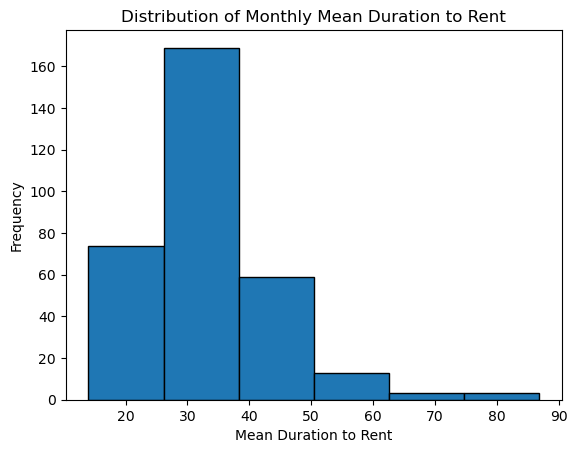

In [164]:
# for plotting distribution 
apartments_before_2000_list = immo.query('Year_Construction<2000').Room_Space
apartments_before_2000_list

apartments_after_2000_list = immo.query('Year_Construction>2000').Room_Space
apartments_after_2000_list


In [ ]:
# plot distribution 
apartments_before_2000_list.plot(kind='hist', bins=6, edgecolor='black')


plt.title('Distribution of Monthly Mean Duration to Rent')
plt.xlabel('Mean Duration to Rent')
plt.ylabel('Frequency')
plt.show()

In [38]:
x = apartments_before_2000
y = apartments_after_2000
print(f'Are the average room spaces for apartments before 2000 larger than after 2000? {x > y}')

Are the average room spaces for apartments before 2000 larger than after 2000? True


In [39]:
immo.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2,Room_Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.69,29.300
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.91,29.330
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.71,41.805
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.69,42.795
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.74,44.135


***
#### Task 7. 
Assuming that high-quality conditions are: first_time_use, mint_condition, refurbished, first_time_use_after_refurbishment, and fully_renovated. The rest can be categorized as low-quality conditions. 

*What's the percentage of apartments in high-quality condition?*

> Answer: 68.59% of apartments in Berlin are considered high-quality.  
***

In [41]:
immo.Condition.value_counts()

Condition
first_time_use                        270
mint_condition                        143
no_information                        111
well_kept                              96
refurbished                            40
first_time_use_after_refurbishment     36
fully_renovated                        35
modernized                             29
need_of_renovation                      4
Name: count, dtype: int64

In [42]:
# percentage of the apartments in high quality condition 
    # high quality conditions/total conditions * 100
    
def high_low_quality(row):
    if row['Condition'] in ['no_information', 'well_kept', 'modernized', 'need_of_renovation']:
        val = 'low_quality'
    else:
        val = 'high_quality'
    return val

immo['Quality'] = immo.apply(high_low_quality, axis=1)

In [43]:
immo.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2,Room_Space,Quality
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.69,29.300,high_quality
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.91,29.330,high_quality
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.71,41.805,low_quality
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.69,42.795,low_quality
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.74,44.135,high_quality


In [44]:
num_high_quality = len(immo[immo['Quality'] == "high_quality"])
print(f'Number of high quality apartments: {num_high_quality}')

# high quality conditions/total conditions * 100
print(f'Percentage of high quality apartments: {round((num_high_quality / len(immo['Quality'])) * 100)}%')

Number of high quality apartments: 524
Percentage of high quality apartments: 69%


### <center> Summary </center> 
***

Task 1:
> How many apartments are there in Mitte in a 'well-kept' condition?
<br> Answer: There are 96 'well-kept' apartments in Mitte.

Task 2.
> How many apartments in Kreuzberg were built before 1900? <br> Answer: There are 3 apartments in Kreuzberg built before 1900.

Task 3.
> What is the average space of the apartments with 4 rooms? <br> Answer: The average space of apartments having 4 rooms is 130.86 square meters.

Task 4.
> What is the most expensive region on average, and what is the maximum rent for this region? <br> Answer: The most expensive region on average is the Mitte region, and the most expensive rent in this region is 14207 Euros.

Task 5.
> What are the min, max, and average number of rooms of the apartments in Köpenick? (Bonus)
> <br> Answer: The minimum number of rooms in apartments in Köpenick is 1, and the maximum number of rooms in apartments in Köpenick is 4. On average, there are about 2 rooms in apartments in Köpenick.

Task 7.
> Is there a difference in average room space (Space divided by Rooms) for apartments built before versus after 2000?


### <center> Pandas Project: Immobilien Scout 24 (Part Three) <center> 

***

In [49]:
immo.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2,Room_Space,Quality
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.69,29.300,high_quality
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.91,29.330,high_quality
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.71,41.805,low_quality
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.69,42.795,low_quality
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.74,44.135,high_quality


***
#### Task 8:
> Is there a shortage of affordable appartments in Berlin as a whole, or is the issue concentrated in select neighbourhoods?
***

#### Brainstorm:
> How would affordable be defined? Median rent price?
> Is "affordability" region-specific?

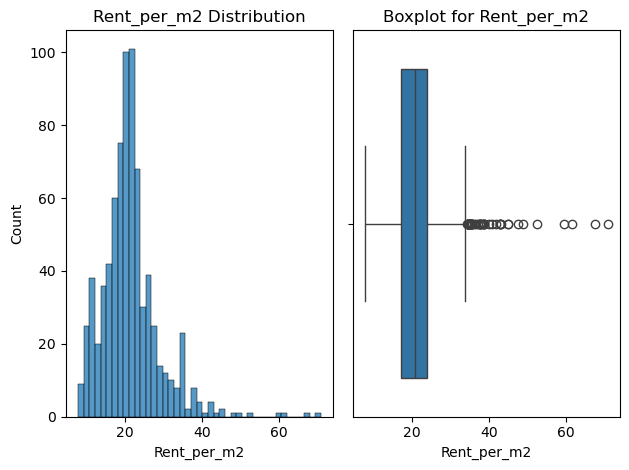

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# side-by-side plots
fig, axes = plt.subplots(1,2)

# plot distribution: plot 1
sns.histplot(x=immo.Rent_per_m2, ax=axes[0])
axes[0].set_title("Rent_per_m2 Distribution")

# boxplot: plot 2
sns.boxplot(x = 'Rent_per_m2', data = immo, ax=axes[1])
axes[1].set_title("Boxplot for Rent_per_m2")
 
plt.tight_layout()
plt.show()

In [53]:
immo.groupby("Region")[["Rent_per_m2"]].describe()

Rent_per_m2                                               \
                      count       mean        std    min     25%     50%   
Region                                                                     
Charlottenburg         79.0  21.394177   7.087415  10.02  16.465  19.750   
Friedrichsfelde        52.0  16.094231   4.153115   7.83  12.955  17.260   
Kreuzberg              47.0  23.332766   6.220560  11.35  18.890  23.000   
Köpenick               55.0  15.630545   3.970890  10.07  12.280  15.260   
Mitte                 153.0  25.966863   9.458363  15.12  20.680  23.000   
Neukölln               59.0  17.347458   5.455689   8.84  12.420  17.240   
Prenzlauer             53.0  21.957736   5.631658  10.00  18.300  20.610   
Tiergarten            171.0  21.461404   4.749266   8.70  20.040  21.250   
Wedding                42.0  22.812619  10.888555   7.95  10.985  20.995   
Wilmersdorf            53.0  21.474717   6.134112  10.69  18.630  20.240   

                                 
                     75%    max  
Region                           
Charlottenburg   25.4150  41.91  
Friedrichsfelde  18.9425  26.87  
Kreuzberg        26.9950  40.91  
Köpenick         16.8350  31.94  
Mitte            27.5100  70.95  
Neukölln         21.4300  34.50  
Prenzlauer       26.3900  38.57  
Tiergarten       23.0200  35.68  
Wedding          33.2825  38.68  
Wilmersdorf      23.7900  38.71

<Axes: xlabel='Rent_per_m2', ylabel='Region'>

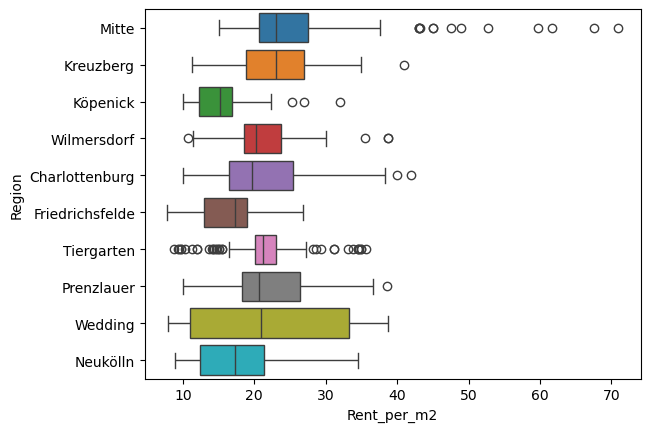

In [54]:
sns.boxplot(x='Rent_per_m2',
            y='Region',
            hue = 'Region',
            data = immo)

Notes on Affordability:
> We will define affordability as a `Rent_per_m2` that is equal to or lower than the average overall value and region-specific.
> Since the data contains alot of outliers, we will use the median value. For the overall median, we will not include Mitte in this calculation has it is a region that has really larger outliers outside of the IQR of the other regions.

In [56]:
# calculate median, excluding Mitte
median = immo[immo['Region'] != 'Mitte']['Rent_per_m2'].median()
median

20.08

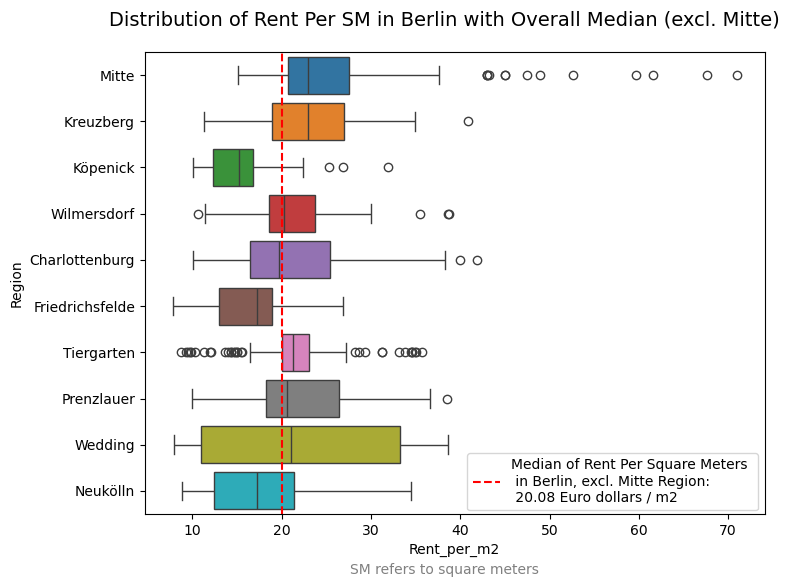

In [57]:
# plot vertical median line
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Rent_per_m2',
            y='Region',
            hue = 'Region',
            data = immo,
            ax=ax)

plt.axvline(median, color='red', linestyle='--', label=f'Median of Rent Per Square Meters \n in Berlin, excl. Mitte Region: \n {median} Euro dollars / m2')
ax.legend(loc='right', bbox_to_anchor=(1, 0.07))

# Centered title
fig.suptitle("Distribution of Rent Per SM in Berlin with Overall Median (excl. Mitte)", 
             fontsize=14, y=0.95, ha='center')

# Caption
fig.text(0.5, 0.01, "SM refers to square meters", 
         ha='center', fontsize=10, color='gray')

# plt.tight_layout(rect=[1, 0.1, 1, 0.9])  # Leave space for title and caption
plt.show()

### PART B: Two additional columns are added to the dataset: `Posted_date` and `Rented_date` to answer the next following questions.

In [59]:
immo.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2,Room_Space,Quality
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.69,29.300,high_quality
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.91,29.330,high_quality
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.71,41.805,low_quality
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.69,42.795,low_quality
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.74,44.135,high_quality


In [60]:
immo.describe()

,Rooms,Rent,Year_Construction,Space,Rent_per_m2,Room_Space
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270,21.478717,33.143038
std,1.010826,1118.263961,48.006060,44.195338,7.487995,9.961828
min,1.000000,271.250000,1864.000000,14.000000,7.830000,13.500000
25%,2.000000,1039.500000,1959.000000,55.097500,17.215000,26.997500
50%,2.500000,1565.480000,2015.000000,77.600000,20.750000,31.666667
75%,3.000000,2170.000000,2019.000000,104.450000,23.940000,36.841250
max,7.000000,14207.000000,2020.000000,413.910000,70.950000,109.000000


In [61]:
from random import randrange
import datetime
import numpy as np

In [62]:
# max construction year is 2020, so choose a base date from then 
base_date = datetime.datetime(2020, 1, 1)

In [73]:
# function adding posting date from 2020
set.seed(10)
def add_posted_date(base_date=base_date):
    return base_date + datetime.timedelta(days=randrange(365))

immo['Posted_date'] = [add_posted_date() for _ in range(len(immo))]

In [77]:
# function adding a rental date (which is after the posting date)
set.seed(10)
def add_rented_date(posted_date):
    while True:
        days_to_add = randrange(60)
        rented_date = posted_date + datetime.timedelta(days=days_to_add)
        if rented_date.weekday() < 5:  # 0 = Monday, ..., 4 = Friday, avoid weekends
            return rented_date

immo['Rented_date'] = immo.Posted_date.apply(lambda x: add_rented_date(x))

In [79]:
immo.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2,Room_Space,Quality,Posted_date,Rented_date
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.69,29.300,high_quality,2020-09-27,2020-10-30
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.91,29.330,high_quality,2020-03-03,2020-04-06
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.71,41.805,low_quality,2020-01-28,2020-02-10
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.69,42.795,low_quality,2020-02-05,2020-03-11
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.74,44.135,high_quality,2020-02-18,2020-03-12


In [81]:
immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Region             764 non-null    object        
 1   Condition          764 non-null    object        
 2   Rooms              764 non-null    float64       
 3   Rent               764 non-null    float64       
 4   Year_Construction  764 non-null    int64         
 5   Space              764 non-null    float64       
 6   Rent_per_m2        764 non-null    float64       
 7   Room_Space         764 non-null    float64       
 8   Quality            764 non-null    object        
 9   Posted_date        764 non-null    datetime64[ns]
 10  Rented_date        764 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(3)
memory usage: 65.8+ KB


***
#### Task 9:
How many apartments were posted each month?
> Answer: (see below) The month that saw the most apartments being posted was the month of December.
***

In [83]:
# the numbers of apartments posting each month
immo.groupby(immo["Posted_date"].dt.month).size()

Posted_date
1     56
2     65
3     59
4     67
5     57
6     50
7     72
8     54
9     74
10    72
11    58
12    80
dtype: int64

***
#### Task 10:
How many days does it take from posting about the apartment to renting it? How does the duration of this listing change depending on the month it is posted?
> Answer: On average, it takes about a month for an apartment to be rented after it is posted. 
***

In [91]:
def calc_post_rent(row):
    return row.Rented_date - row.Posted_date

immo['Duration_To_Rent'] = immo.apply(calc_post_rent, axis=1)

In [93]:
immo.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Rent_per_m2,Room_Space,Quality,Posted_date,Rented_date,rent_delta,Duration_To_Rent
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.69,29.300,high_quality,2020-09-27,2020-10-30,33 days,33 days
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.91,29.330,high_quality,2020-03-03,2020-04-06,34 days,34 days
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.71,41.805,low_quality,2020-01-28,2020-02-10,13 days,13 days
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.69,42.795,low_quality,2020-02-05,2020-03-11,35 days,35 days
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.74,44.135,high_quality,2020-02-18,2020-03-12,23 days,23 days


In [103]:
immo['Duration_To_Rent'].mean().round('s')

Timedelta('30 days 15:21:41')

In [123]:
monthly_rent_dur_mean = immo['Duration_To_Rent'].groupby(immo['Posted_date'].dt.month).mean()
print(monthly_rent_dur_mean)

Posted_date
1    34 days 09:51:25.714285714
2    32 days 15:08:18.461538461
3    28 days 19:55:55.932203390
4    33 days 21:29:33.134328358
5    29 days 18:06:18.947368421
6              27 days 23:31:12
7              30 days 15:20:00
8              32 days 15:06:40
9    30 days 12:58:22.702702702
10             28 days 23:40:00
11   26 days 19:02:04.137931034
12             30 days 07:30:00
Name: Duration_To_Rent, dtype: timedelta64[ns]


In [137]:
monthly_rent_dur_mean.dtype #dtype('<m8[ns]') - timedelta64

dtype('<m8[ns]')

#### To summarize:
